In [1]:
import site
import pickle as pkl
import h5py as hp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import copy

def siteFG():
    FGPATH = '/home/cosinga/figrid/'
    site.addsitedir(FGPATH)
    return

def trgba(attr, value, alpha = 1.0):
    return mpl.colors.to_rgba(ds.attr_args[attr][value]['color'], alpha)
siteFG()
from figrid.data_sort import DataSort
plt.rcParams['mathtext.fontset'] = 'dejavuserif'
plt.rcParams['font.family'] = 'serif'
THBIAS = r'$b_{\mathrm{HI}} (k) = P_{\mathrm{HI-m}} (k) / P_{\mathrm{m}} (k)$'
OBSBIAS = r"$b_{\mathrm{HI}} (k) = \sqrt{P_{\mathrm{HI}} (k) / P_{\mathrm{m}} (k)}$"
CORRCOEF = r'r (k) = $\frac{\mathrm{P}_{\mathrm{HI-m}}(k)}{\sqrt{\mathrm{P}_{\mathrm{HI}}(k) \mathrm{P}_{\mathrm{m}}(k)}}$'

In [2]:
ds = pkl.load(open('/home/cosinga/hcolor/fig_md_analysis/bias_results.pkl', 'rb'))
print(ds.getAttrs())
XLAB = 'k (cMpc/h)$^{-1}$'
YLAB = 'P$_{%s}$ (k) (cMpc/h)$^{-3}$'
ds.tickArgs({'direction':'in', 'labelsize':12})
ds.legendArgs({'frameon':False, 'loc':'upper right', 'fontsize':12}, slc = (0,0))
ds.rowLabelArgs(pos = [0.05, 0.05], txtkw = {'fontsize':14, 'ha':'left', 'va':'bottom'})
ds.colLabelArgs(pos = [0.5, 0.95], txtkw = {'fontsize':14, 'ha':'center', 'va':'top'})
ds.axisArgs({'xscale':'log', 'yscale':'log', 'xlim':[0.11866199299595938, 20]})
ds.axisLabelArgs('both', {'fontsize':14})
ds.setOrder('space', ['real', 'redshift', 'rsd'])
ds.setOrder('snapshot', [99, 67])
ds.displayAs('space', ['real', 'redshift', 'rsd'], ['Real Space', 'Redshift Space', 'Redshift Space\nDistortions'])
ds.displayAs('HI_fieldname', ['hisubhalo', 'vn', 'hiptl'], ['Galaxy Centers', 'All Particles', 'Galaxies by Particle'])
ds.displayAs('fieldname', ['hisubhalo', 'vn', 'hiptl', 'ptl'], ['Galaxy Centers', 'All Particles', 'Galaxies by Particle', 'Matter'])
ds.displayAs('snapshot', [99, 67], ['z = 0.0', 'z = 0.5'])
ds.displayAs('color', ['red', 'blue', 'resolved', 'ratio'],
            [r'Red Galaxy Bias', r'Blue Galaxy Bias',
            r'Galaxy Bias', r'Color Ratio'])
ds.plotArgs('color', 'red', {'color':'red'})
ds.plotArgs('color', 'blue', {'color':'blue'})
ds.plotArgs('space', 'real', {'color':'green'})
ds.plotArgs('space', 'redshift', {'color':'orange'})
ds.plotArgs('HI_fieldname', 'hiptl', {'color':'saddlebrown'})
ds.plotArgs('HI_fieldname', 'vn', {'color':'firebrick'})
ds.plotArgs('HI_fieldname', 'hisubhalo', {'color':'sandybrown'})
ds.plotArgs('fieldname', 'hiptl', {'color':'saddlebrown'})
ds.plotArgs('fieldname', 'vn', {'color':'firebrick'})
ds.plotArgs('fieldname', 'hisubhalo', {'color':'sandybrown'})

['path', 'result_runtime', 'is_auto', 'box', 'simname', 'sim_resolution', 'num_part', 'grid_resolution', 'snapshot', 'redshift', 'axis', 'fieldname', 'is_hydrogen', 'is_atomic', 'is_molecular', 'is_particle', 'is_groupcat', 'is_matter', 'mas', 'space', 'compute_xi', 'compute_slice', 'map', 'model', 'HI_fieldname', 'color', 'gal_species', 'gal_res', 'color_cut', 'ptl_species', 'projection', 'HI_res', 'censat', 'post_process', 'numerator', 'denominator']


# HI-matter X-power

In [3]:
%%capture
ip = {'is_auto':False, 'HI_fieldname':['vn','hiptl'], 
      'axis':0, 'grid_resolution':800, 'simname': 'tng100', 
      'ptl_species':'ptl', 'sim_resolution':'high', 
      'censat':'no key found', 'mas':'CICW', 'post_process':'no key found'}
ip['space'] = ['real', 'redshift']
ip['snapshot'] = [99, 67]
fg = ds.figrid('HI_fieldname', 'space', 'snapshot', ip)

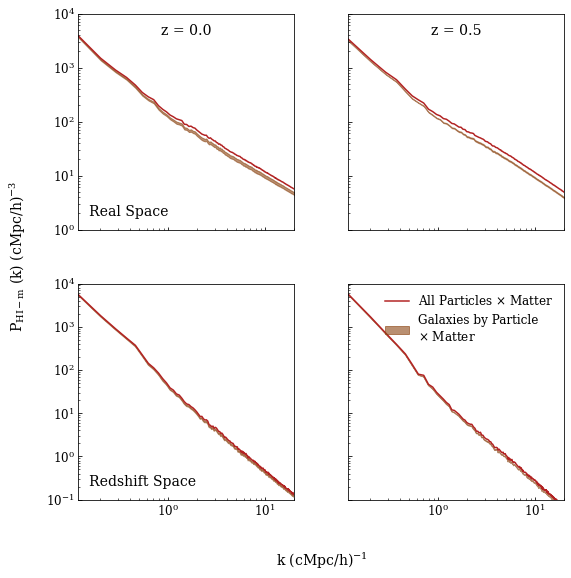

In [4]:
fg.plotArgs('vn', {'label':'All Particles $\\times$ Matter'})
fg.plotArgs('hiptl', {'label':'Galaxies by Particle \n$\\times$ Matter'})
fg.autoFill({'alpha':0.6})
fg.legendArgs({}, (1,1))
fg.setDefaultTicksParams()
fg.axisArgs({'ylim':(1, 1e4)})
fg.axisArgs({'ylim':(.1, 1e4)}, ['redshift'])
fg.setXLabel(XLAB)
fg.setYLabel(YLAB%r"\mathrm{HI-m}")
fg.plot()
fg.save('HIXmatter_snapshot_space.png')
fg.fig

# HI-matter auto comparison

In [5]:
%%capture
ip = {'is_auto':True, 'fieldname':['vn','hiptl', 'ptl'], 
      'axis':0, 'grid_resolution':800, 'simname': 'tng100', 
      'sim_resolution':'high', 'ptl_species':['no key found', 'ptl'],
      'censat':'no key found', 'mas':'CICW', 'post_process':'no key found', 'path':'fiducial'}
ip['space'] = ['real', 'redshift']
ip['snapshot'] = [99, 67]
fg = ds.figrid('fieldname', 'space', 'snapshot', ip)

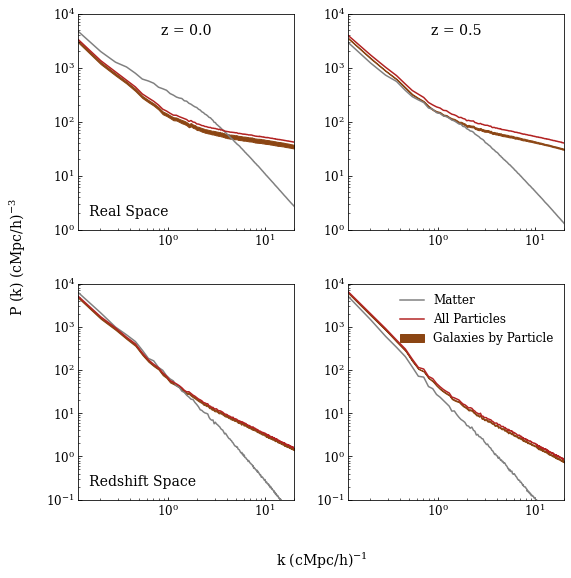

In [6]:
fg.plotArgs('ptl', {'color':'gray'})
fg.autoFill()
fg.legendArgs({}, (1,1))
fg.axisArgs({'ylim':(1,1e4)})
fg.axisArgs({'ylim':(.1, 1e4)}, ['redshift'])
fg.setXLabel(XLAB)
fg.setYLabel(YLAB%"")
fg.plot()
fg.save('HI-matter_auto_comparison.png')
fg.fig

# HI-matter Bias

In [7]:
%%capture
spaces = ['real', 'redshift']
snapshots = [67, 99]
ip = {'is_auto':False, 'HI_fieldname':['vn','hiptl'], 
      'axis':0, 'grid_resolution':800, 'simname': 'tng100', 
      'ptl_species':'ptl', 'sim_resolution':'high', 
      'censat':'no key found', 'mas':'CICW', 'post_process':'obs_bias',
     'denominator':'ptl'}
ip['space'] = spaces
ip['snapshot'] = [99, 67]
# ip['HI_fieldname'] = 'vn_hiptl'
fg = ds.figrid('HI_fieldname', 'space', 'snapshot', ip, figrid_args = {'hspace': 0.1})


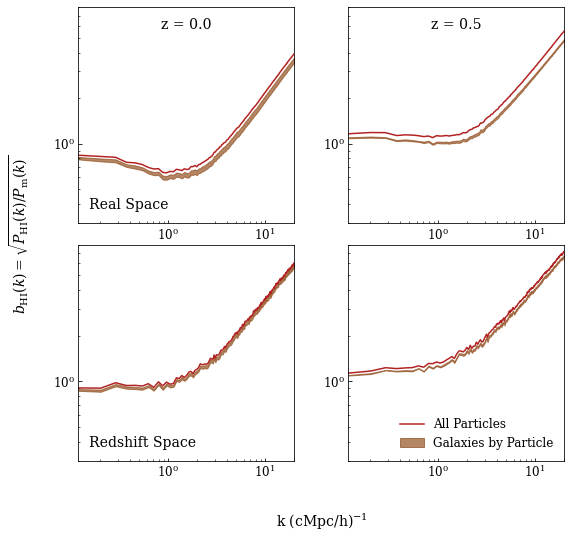

In [8]:
fg.fill({'HI_fieldname':'hiptl'},{'alpha':0.65})
fg.legendArgs({'loc':'lower right'}, (1,1))
# fg.rowLabelArgs([], pos = [0.05, 0.5])
fg.axisArgs({'ylim':(0.3, 8)})
fg.setYLabel(OBSBIAS)
fg.setXLabel(XLAB)
fg.plot()
# fg.save('HI-ptl_obs_bias.png')
fg.fig

In [9]:
%%capture
spaces = ['real', 'redshift']
snapshots = [67, 99]
ip = {'is_auto':False, 'HI_fieldname':['vn','hiptl'], 
      'axis':0, 'grid_resolution':800, 'simname': 'tng100', 
      'ptl_species':'ptl', 'sim_resolution':'high', 
      'censat':'no key found', 'mas':'CICW', 'post_process':'theory_bias',
     'denominator':'ptl'}
ip['space'] = spaces
ip['snapshot'] = [99, 67]
# ip['HI_fieldname'] = 'vn_hiptl'
fg = ds.figrid('HI_fieldname', 'space', 'snapshot', ip, figrid_args = {'hspace': 0.1}, figkw = {'dpi':200})


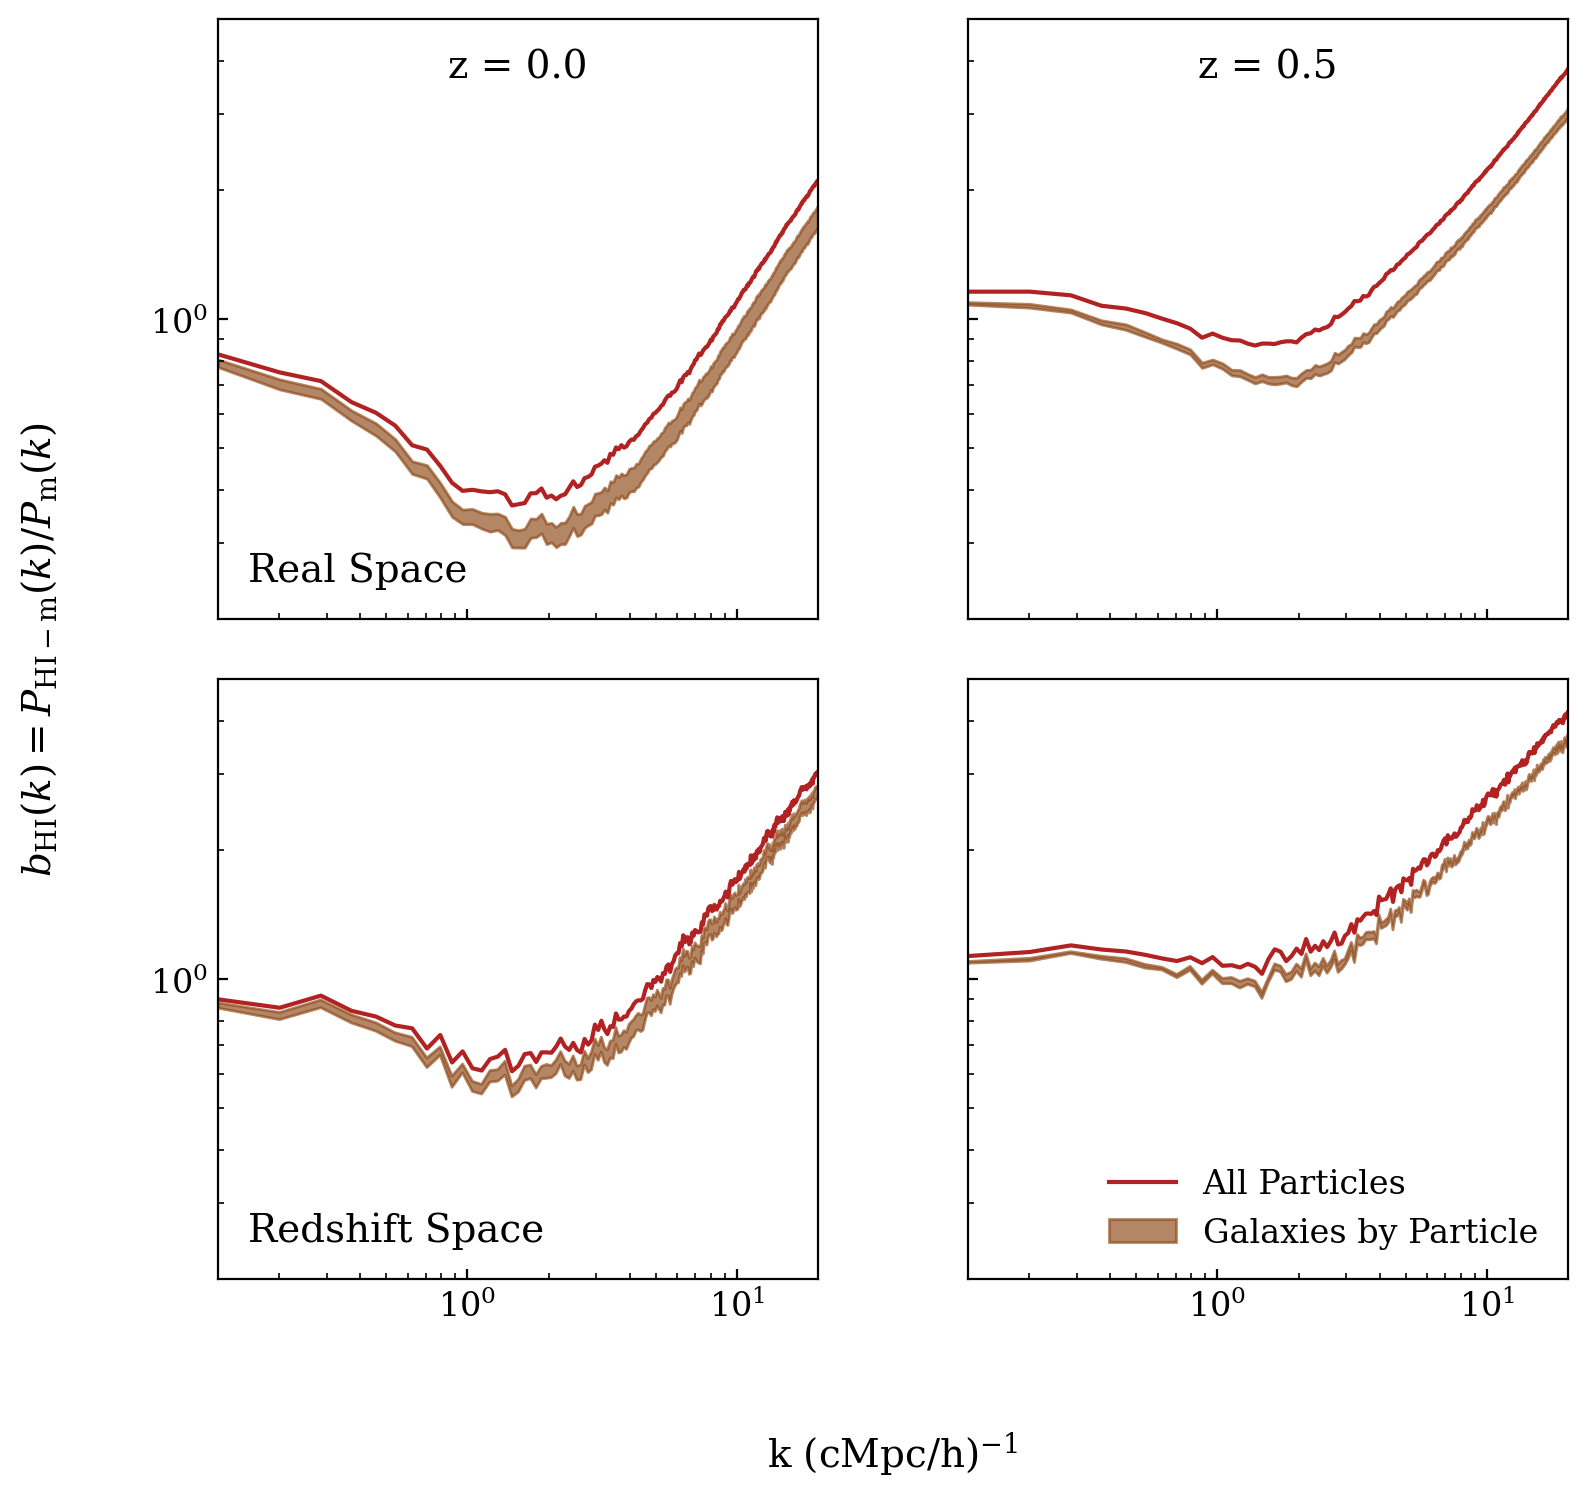

In [10]:
fg.fill({'HI_fieldname':'hiptl'},{'alpha':0.65})
fg.legendArgs({'loc':'lower right'}, (1,1))
fg.setXLabel(XLAB)
fg.setYLabel(THBIAS)
fg.setDefaultTicksParams()
# fg.rowLabelArgs([], pos = [0.05, 0.5])
fg.axisArgs({'ylim':(0.2, 5)})
fg.plot()
# fg.save('HI-ptl_theory_bias.png')
fg.fig

In [11]:
%%capture
spaces = ['real', 'redshift']
snapshots = [67, 99]
ip = {'is_auto':False, 'HI_fieldname':['vn','hiptl'], 
      'axis':0, 'grid_resolution':800, 'simname': 'tng100', 
      'ptl_species':'ptl', 'sim_resolution':'high', 
      'censat':'no key found', 'mas':'CICW', 'post_process':'corr_coef'}
ip['space'] = spaces
ip['snapshot'] = [99, 67]
# ip['HI_fieldname'] = 'vn_hiptl'
fg = ds.figrid('HI_fieldname', 'space', 'snapshot', ip, figrid_args = {'hspace': 0.1}, figkw = {'dpi':200})


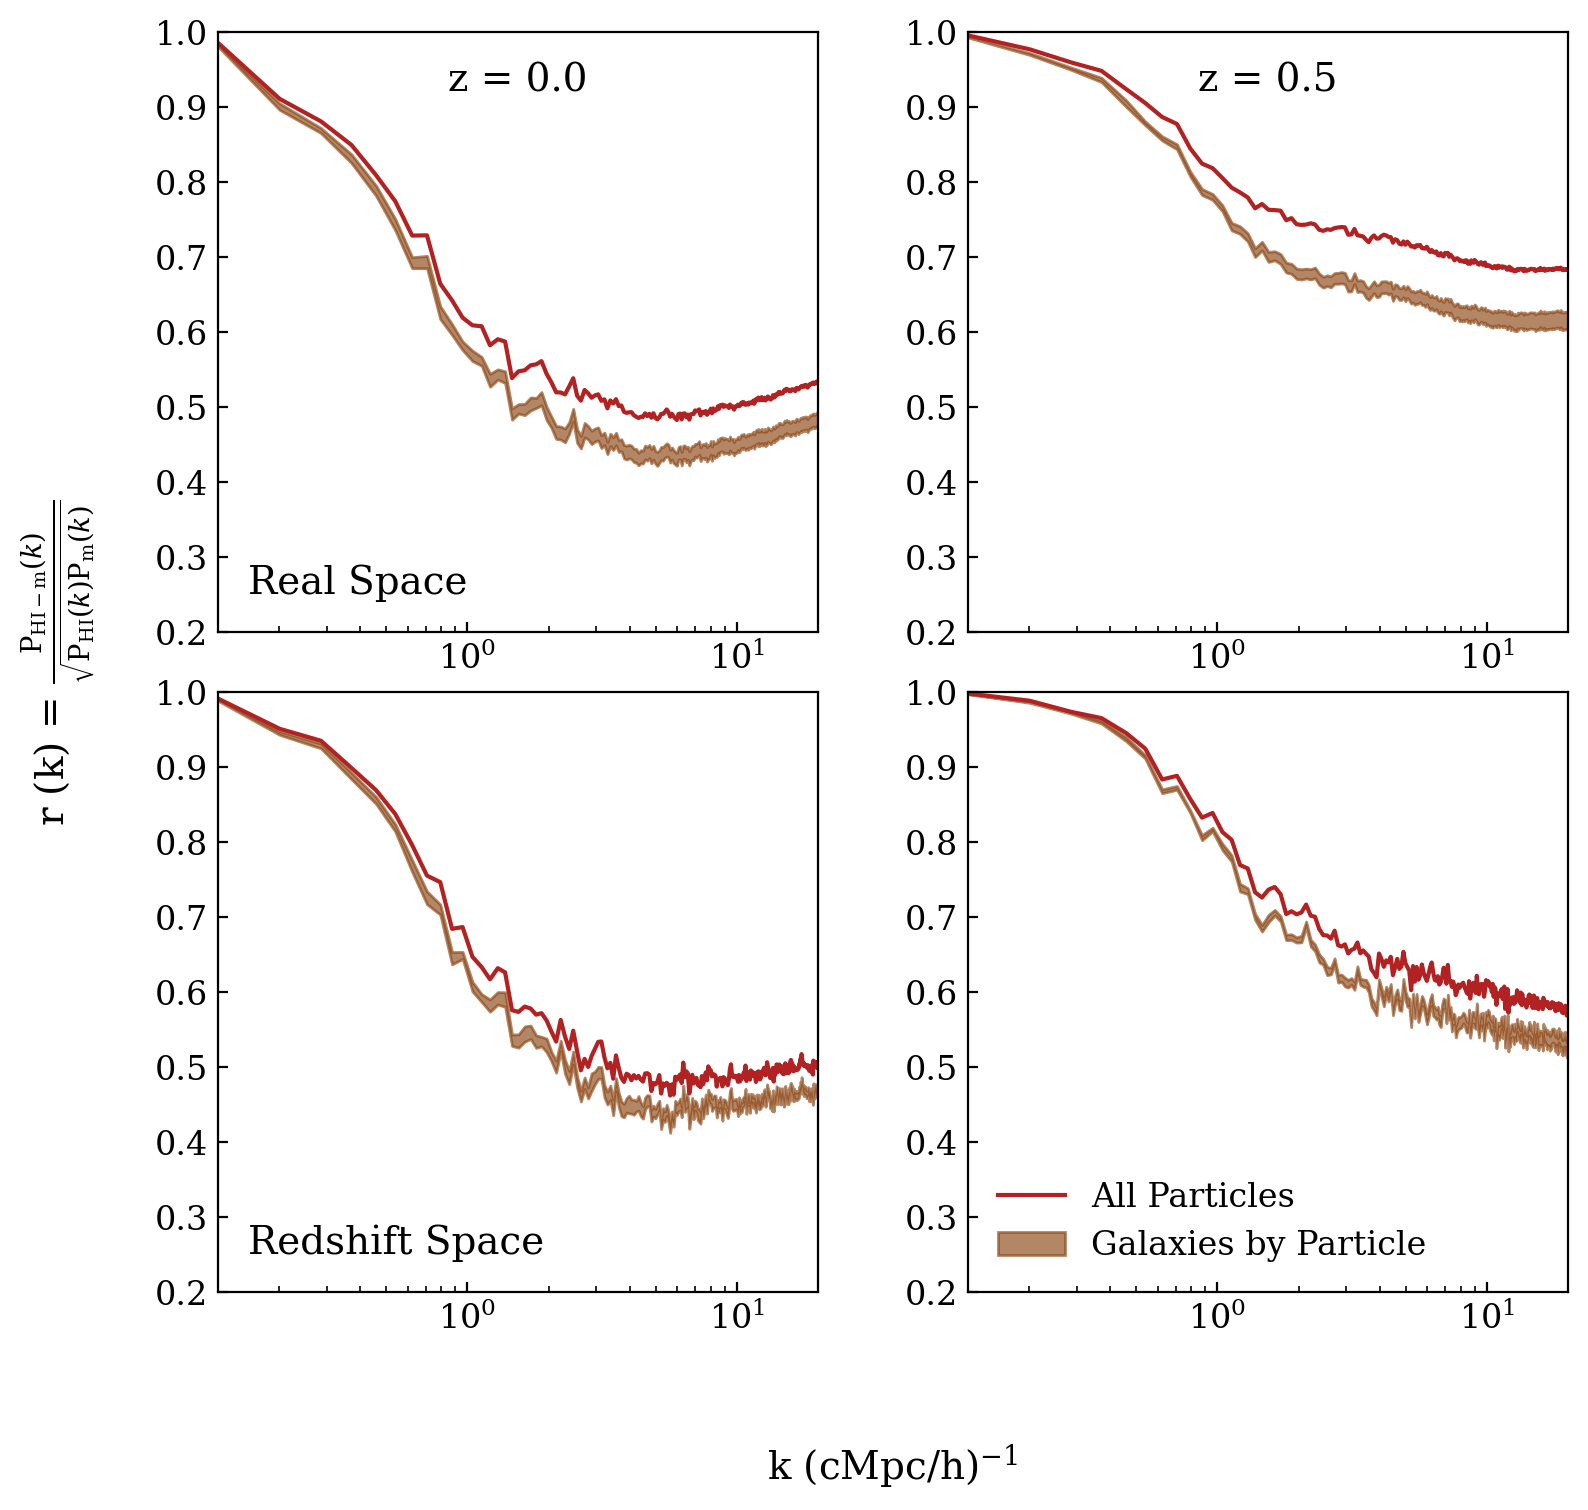

In [12]:
fg.fill({'HI_fieldname':'hiptl'},{'alpha':0.65})
fg.legendArgs({'loc':'lower left'}, (1,1))
fg.axisArgs({'yscale':'linear', 'ylim':(0.2, 1)})
fg.setXLabel(XLAB)
fg.setYLabel(CORRCOEF)
# fg.rowLabelArgs([], pos = [0.05, 0.5])
fg.plot()
# fg.save('HI-ptl_corr_coef.png')
fg.fig

# ptl-galaxy bias DON'T HAVE GALAXYXPTL

In [13]:
THBIAS = r'$b_{\mathrm{m}} (k) = P_{\mathrm{gal-m}} (k) / P_{\mathrm{gal}} (k)$'
OBSBIAS = r"$b_{\mathrm{m}} (k) = \sqrt{P_{\mathrm{m}} (k) / P_{\mathrm{gal}} (k)}$"
CORRCOEF = r'r (k) = $\frac{\mathrm{P}_{\mathrm{gal-m}}(k)}{\sqrt{\mathrm{P}_{\mathrm{gal}}(k) \mathrm{P}_{\mathrm{m}}(k)}}$'

In [14]:
%%capture
ip = {'is_auto':False, 
      'axis':0, 'grid_resolution':800, 'simname': 'tng100',
      'color_cut':'None', 'gal_res':'None',
      'gal_species':'all', 'sim_resolution':'high', 
      'censat':'no key found', 'mas':'CICW', 'color': 'all',
      'post_process':'obs_bias', 'snapshot':[99, 67], 'space':['real', 'redshift'],
      'ptl_species':'ptl', 'denominator':'galaxy'}
fg = ds.figrid('color', 'space', 'snapshot', ip)


In [19]:
ds.printMatching({'post_process':'obs_bias', 'denominator':'galaxy', 'numerator':'ptl', 'ptl_species':'ptl',
                        'gal_species':'total'})
ds.getAttrVals('path')

['fiducial',
 'allgals',
 'midgr',
 'HIbt',
 'all',
 'colordef',
 'censat',
 'MAS',
 'convtest',
 'axistest2',
 'species',
 'axistest1',
 'low-2',
 'galbt',
 'low-3']

# Galaxy-ptl by color

In [ ]:
%%capture
ip = {'is_auto':False, 
      'axis':0, 'grid_resolution':800, 'simname': 'tng100',
      'color_cut':['0.60', 'None'], 'gal_res':'diemer',
      'gal_species':'stmass', 'sim_resolution':'high', 
      'censat':'no key found', 'mas':'CICW', 'color': ['red', 'blue', 'resolved'],
      'post_process':'theory_bias', 'snapshot':[99, 67], 'space':['real', 'redshift'],
     'path':'fiducial', 'ptl_species':'ptl', 'denominator':'ptl'}
fg = ds.figrid('color', 'space', 'snapshot', ip)

No handles with labels found to put in legend.


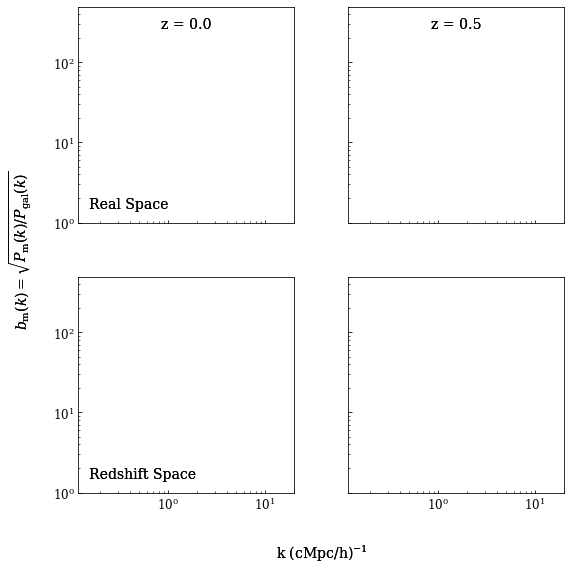

In [20]:
fg.setXLabel(XLAB, txtargs = {'fontsize':14})
fg.setYLabel(OBSBIAS, txtargs = {'fontsize':14})
fg.setDefaultTicksParams()
fg.axisArgs({'ylim':(1,50)}, ['real'])
fg.axisArgs({'ylim':(1, 500)})
fg.legendArgs({}, (1,1))
fg.plot()
fg.save("ptl-galaxy_obs_bias_color.png")
fg.fig

In [14]:
fg.panels

array([[list([]), list([])],
       [list([]), list([])]], dtype=object)

In [12]:
%%capture
ip = {'is_auto':False, 
      'axis':0, 'grid_resolution':800, 'simname': 'tng100',
      'color_cut':['0.60', 'None'], 'gal_res':'diemer',
      'gal_species':'stmass', 'sim_resolution':'high', 
      'censat':'no key found', 'mas':'CICW', 'color': ['red', 'blue', 'resolved'],
      'post_process':'theory_bias', 'snapshot':[99, 67], 'space':['real', 'redshift'],
     'path':'fiducial', 'ptl_species':'ptl', 'denominator':'ptl'}
fg = ds.figrid('color', 'space', 'snapshot', ip)


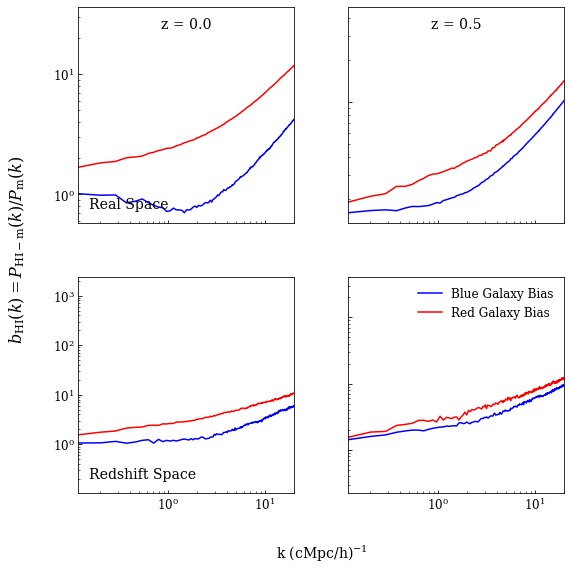

In [13]:
fg.setXLabel(XLAB, txtargs = {'fontsize':14})
fg.setYLabel(THBIAS, txtargs = {'fontsize':16})
fg.setDefaultTicksParams()
# fg.axisArgs({'ylim':(5e-2, 1)})
fg.legendArgs({}, (1,1))
fg.plot()
fg.save("ptl-galaxy_theory_bias_color.png")
fg.fig

In [14]:
%%capture
ip = {'is_auto':False, 
      'axis':0, 'grid_resolution':800, 'simname': 'tng100',
      'color_cut':['0.60', 'None'], 'gal_res':'diemer',
      'gal_species':'stmass', 'sim_resolution':'high', 
      'censat':'no key found', 'mas':'CICW', 'color': ['red', 'blue', 'resolved'],
      'post_process':'corr_coef', 'snapshot':[99, 67], 'space':['real', 'redshift'],
     'path':'fiducial', 'ptl_species':'ptl'}
fg = ds.figrid('color', 'space', 'snapshot', ip)


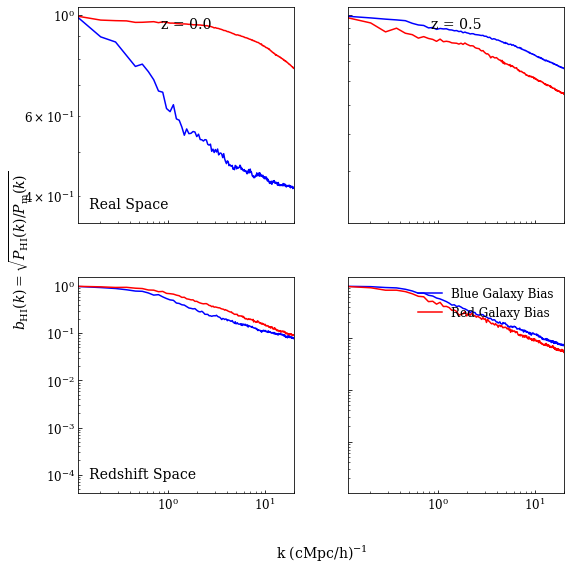

In [15]:
fg.setXLabel(XLAB, txtargs = {'fontsize':14})
fg.setYLabel(OBSBIAS, txtargs = {'fontsize':14})
fg.setDefaultTicksParams()
# fg.axisArgs({'ylim':(5e-2, 1)})
fg.legendArgs({}, (1,1))
fg.plot()
fg.save("ptl-galaxy_corr_coef_color.png")
fg.fig

In [ ]:
ip